## Table of content:
1. Importing the library pdfplumber
2. Load the pdf and display
3. extract simple table
4. extract more complext table(two parallel table in a single page)
5. Debugging the page by Croping the page Using custom .extract_table's settings
6. Save all extracted data into a dataframe

## Import pdfplumber

In [1]:
import pdfplumber
import pandas as pd
print(pdfplumber.__version__)

0.10.3


## Load the PDF

In [2]:
filename = r"SASOL Sustainability Report 2023 20-09.pdf"

In [3]:
pdf = pdfplumber.open(filename,strict_metadata=True)
page = pdf.pages[0]

## Get the first page

In [4]:
p0 = pdf.pages[0] # page index start with 0

## Display the first page

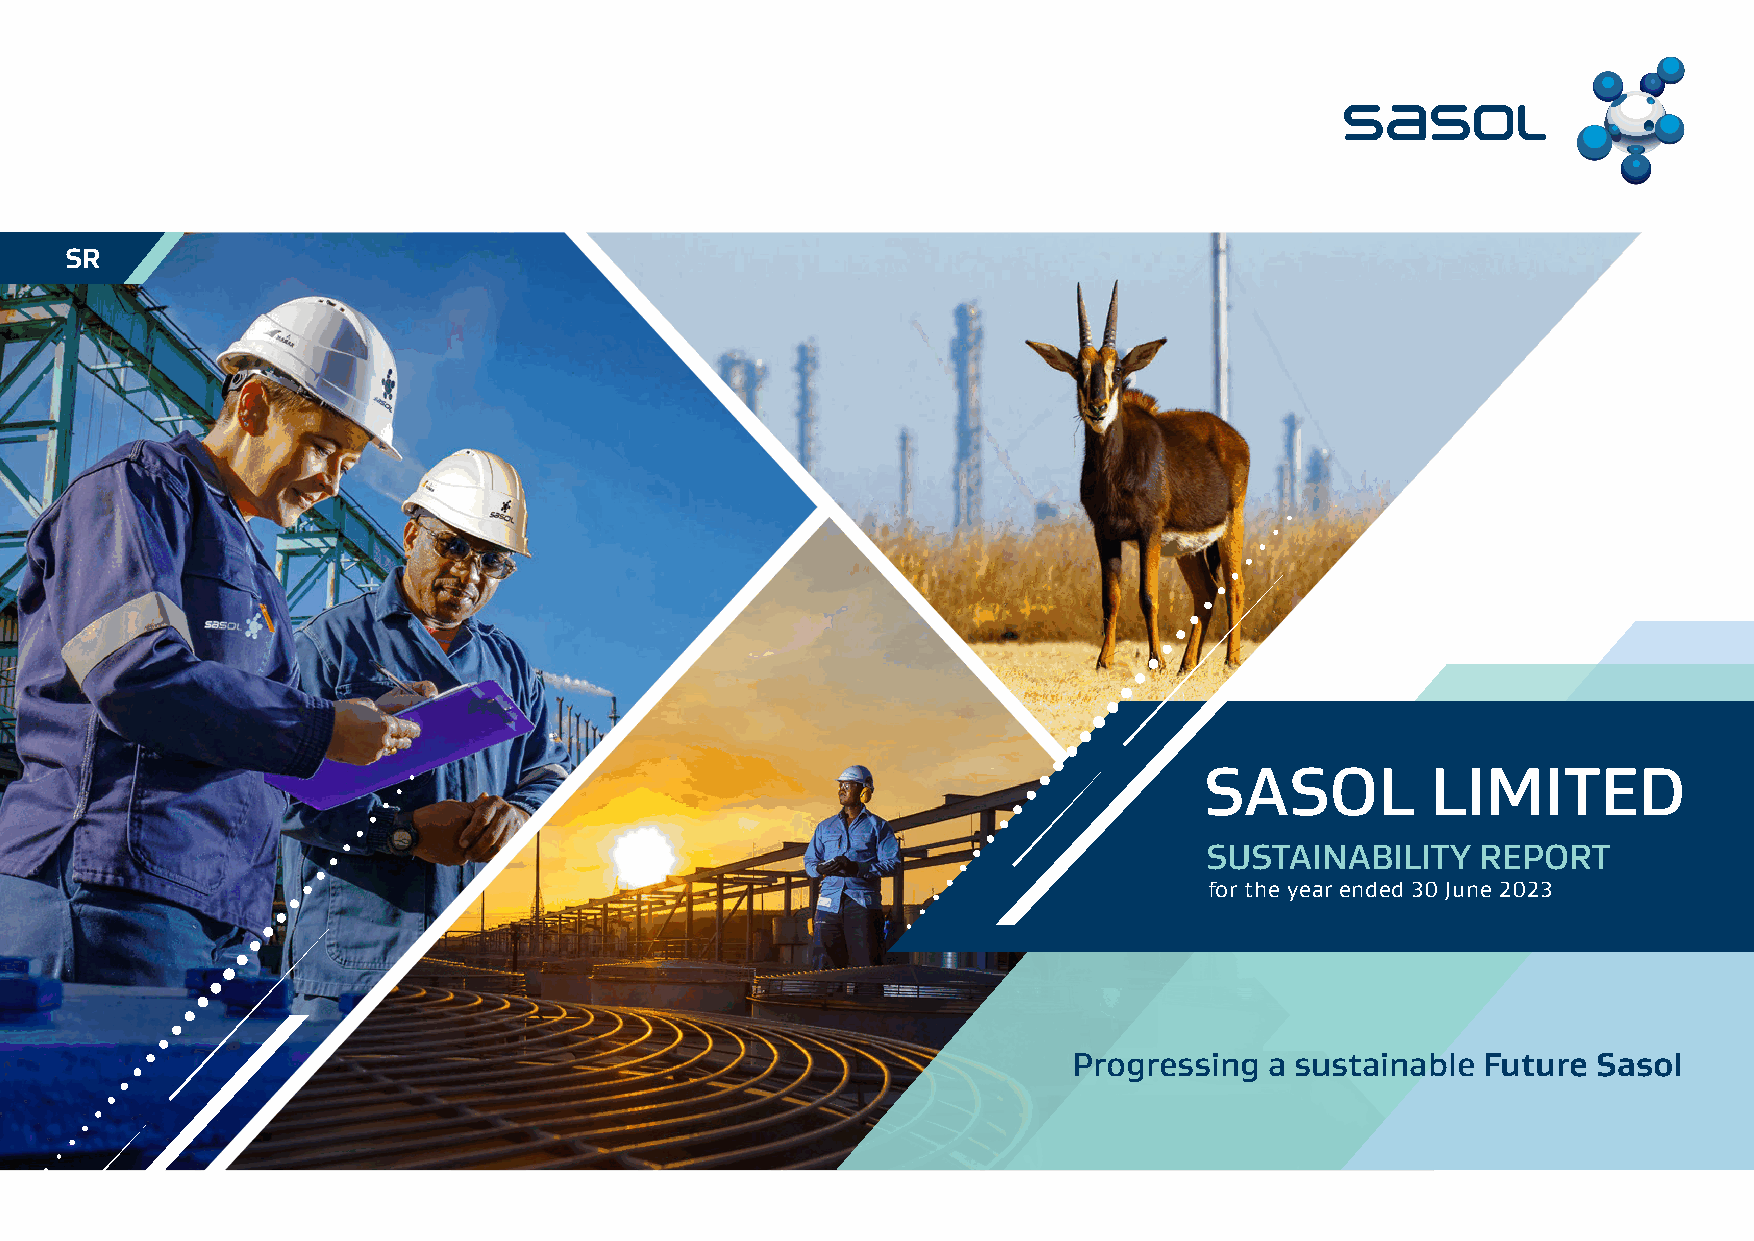

In [5]:
im = p0.to_image(resolution=150)
im

## Lets extract a simple table presented at page 18

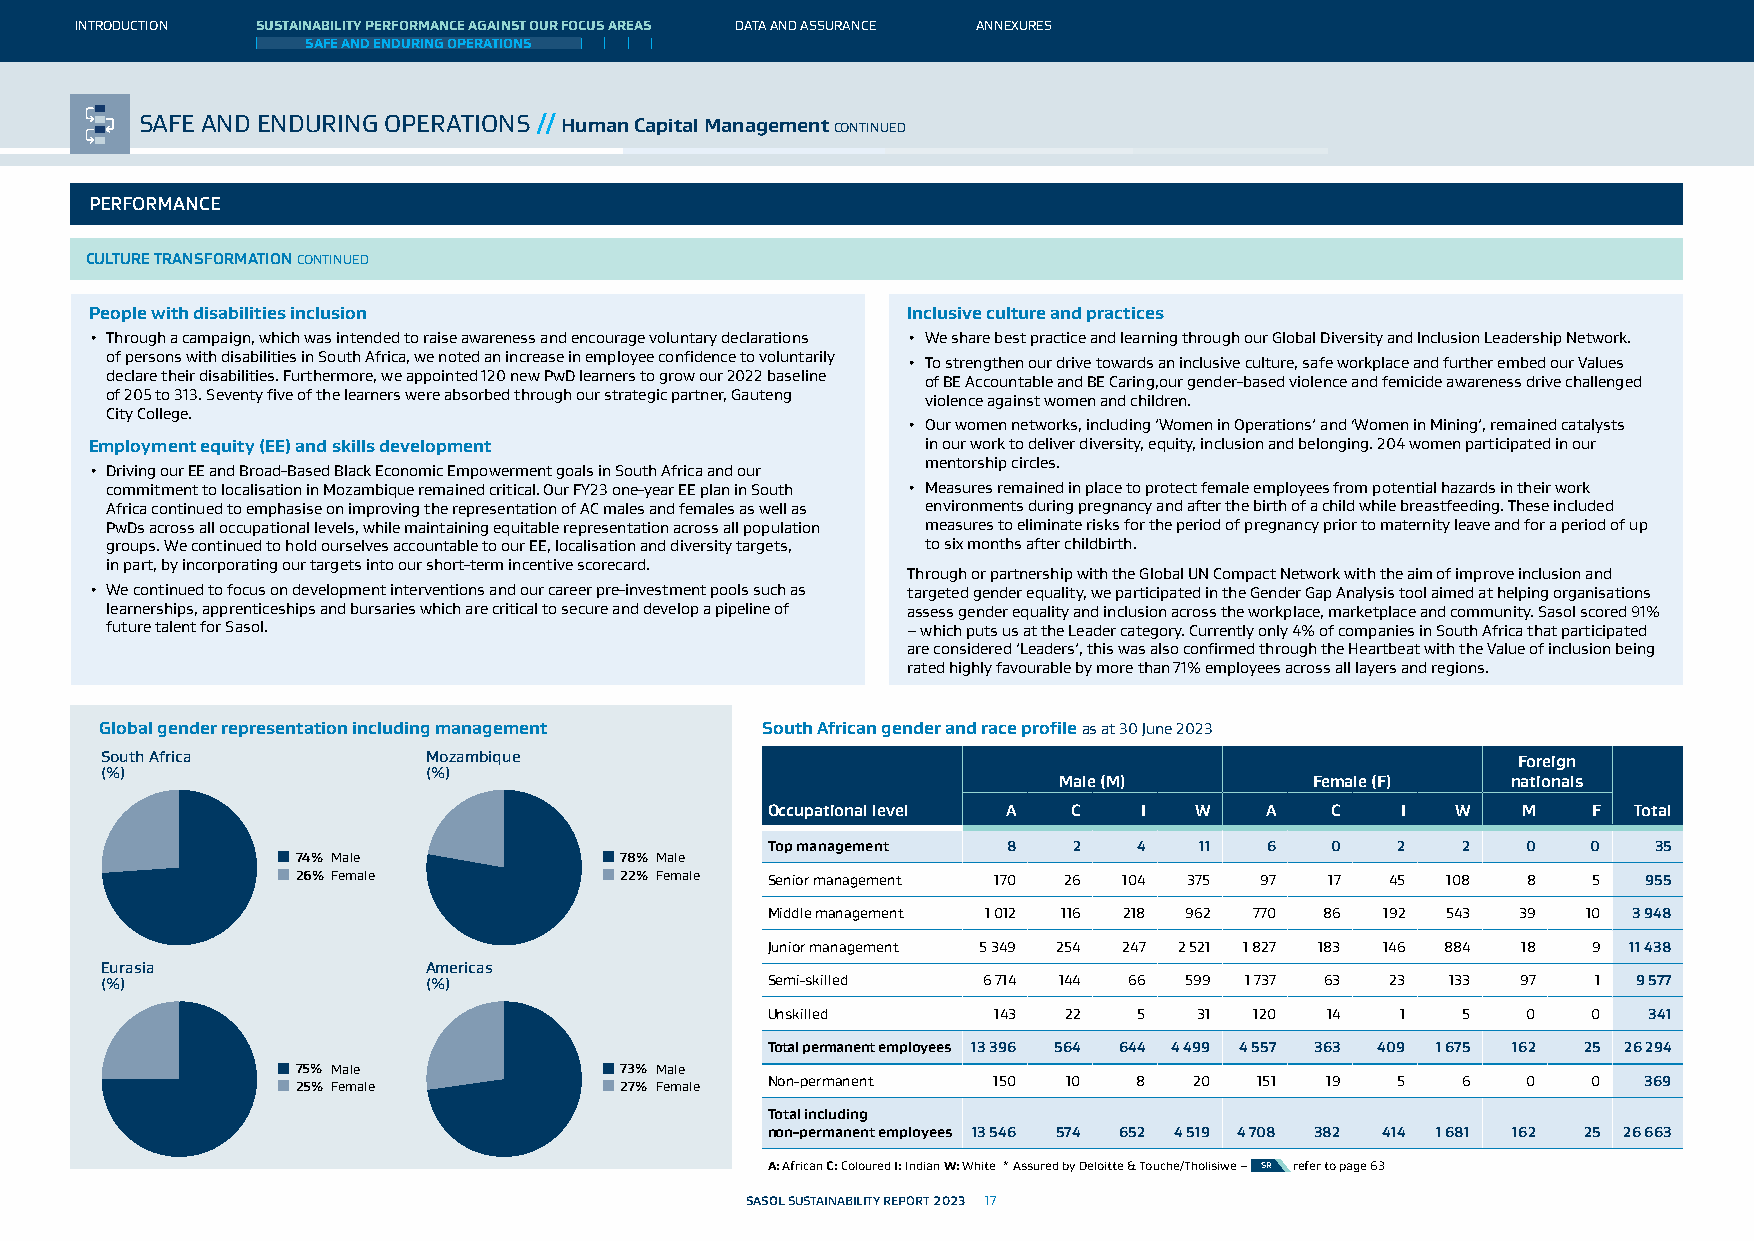

In [6]:
p0 = pdf.pages[17]
im = p0.to_image(resolution=150)
im

## Use .extract_table to get the data from the largest table on the page

In [7]:
table = p0.extract_table()

In [8]:
table

[['Occupational level',
  'Male (M)',
  None,
  None,
  None,
  'Female (F)',
  None,
  None,
  None,
  'Foreign\nnationals',
  None,
  'Total'],
 [None, 'A', 'C', 'I', 'W', 'A', 'C', 'I', 'W', 'M', 'F', None],
 ['Top management', '8', '2', '4', '11', '6', '0', '2', '2', '0', '0', '35'],
 [None,
  '170 26 104 375',
  None,
  None,
  None,
  '97 17 45 108',
  None,
  None,
  None,
  '8 5',
  None,
  '955'],
 [None,
  '1 012 116 218 962',
  None,
  None,
  None,
  '770 86 192 543',
  None,
  None,
  None,
  '39 10',
  None,
  '3 948'],
 [None,
  '5 349 254 247 2 521',
  None,
  None,
  None,
  '1 827 183 146 884',
  None,
  None,
  None,
  '18 9',
  None,
  '11 438'],
 [None,
  '6 714 144 66 599',
  None,
  None,
  None,
  '1 737 63 23 133',
  None,
  None,
  None,
  '97 1',
  None,
  '9 577'],
 [None,
  '143 22 5 31',
  None,
  None,
  None,
  '120 14 1 5',
  None,
  None,
  None,
  '0 0',
  None,
  '341'],
 ['Total permanent employees',
  '13 396',
  '564',
  '644',
  '4 499',
  '4 557

## Put the data in a Pandas Dataframe

In [9]:
df = pd.DataFrame(table[1:], columns=table[0])

In [10]:
df

,Occupational level,Male (M),None,None,None,Female (F),None,None,None,Foreign\nnationals,None,Total
0,None,A,C,I,W,A,C,I,W,M,F,None
1,Top management,8,2,4,11,6,0,2,2,0,0,35
2,None,170 26 104 375,None,None,None,97 17 45 108,None,None,None,8 5,None,955
3,None,1 012 116 218 962,None,None,None,770 86 192 543,None,None,None,39 10,None,3 948
4,None,5 349 254 247 2 521,None,None,None,1 827 183 146 884,None,None,None,18 9,None,11 438
5,None,6 714 144 66 599,None,None,None,1 737 63 23 133,None,None,None,97 1,None,9 577
6,None,143 22 5 31,None,None,None,120 14 1 5,None,None,None,0 0,None,341
7,Total permanent employees,13 396,564,644,4 499,4 557,363,409,1 675,162,25,26 294
8,None,150 10 8 20,None,None,None,151 19 5 6,None,None,None,0 0,None,369
9,Total including\nnon-permanent employees,13 546,574,652,4 519,4 708,382,414,1 681,162,25,26 663


__Now Basic cleanup needed as per requirement__

## Lets extract a bit complex table presented at page 59

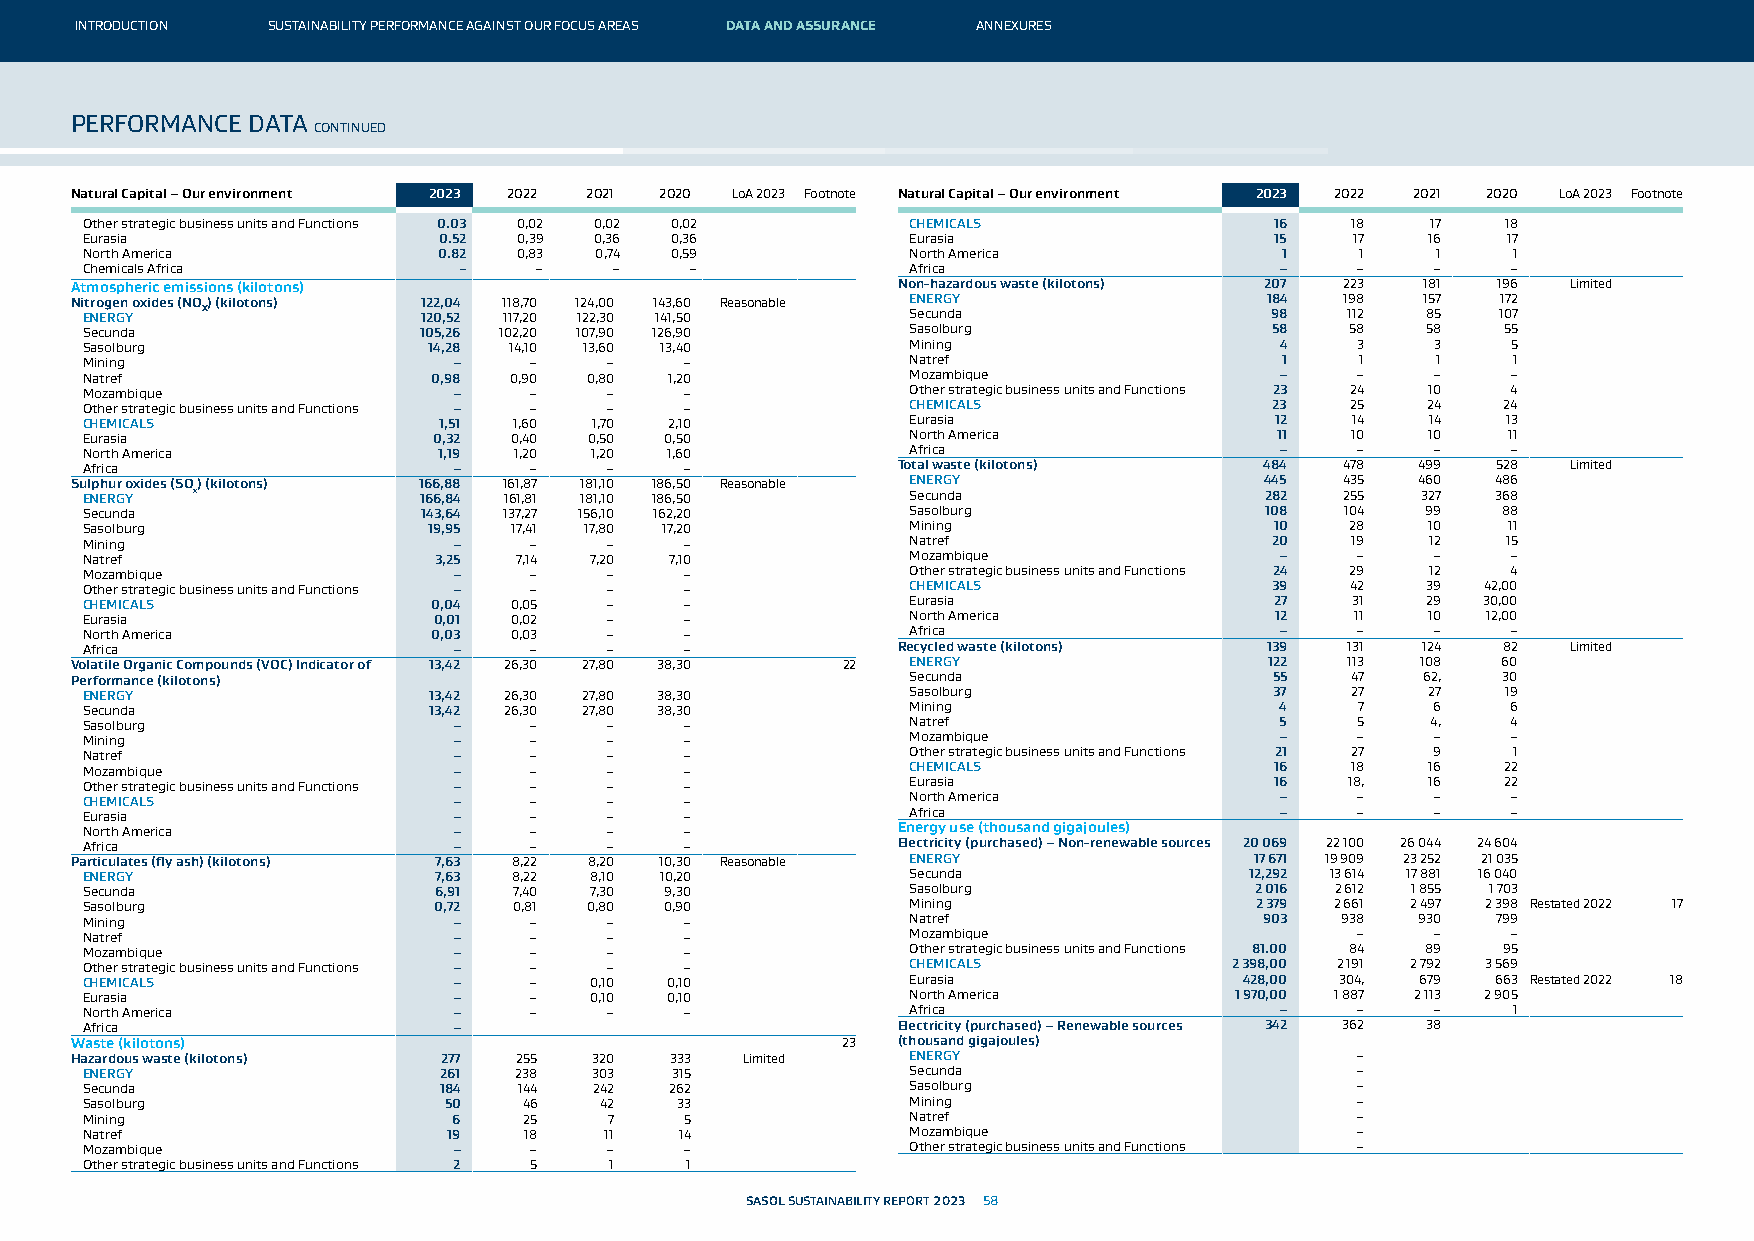

In [11]:
page = pdf.pages[58]
im = page.to_image(resolution=150)
im

In [12]:
page.height, page.width

(595.276, 841.89)

## Crop and save the page 

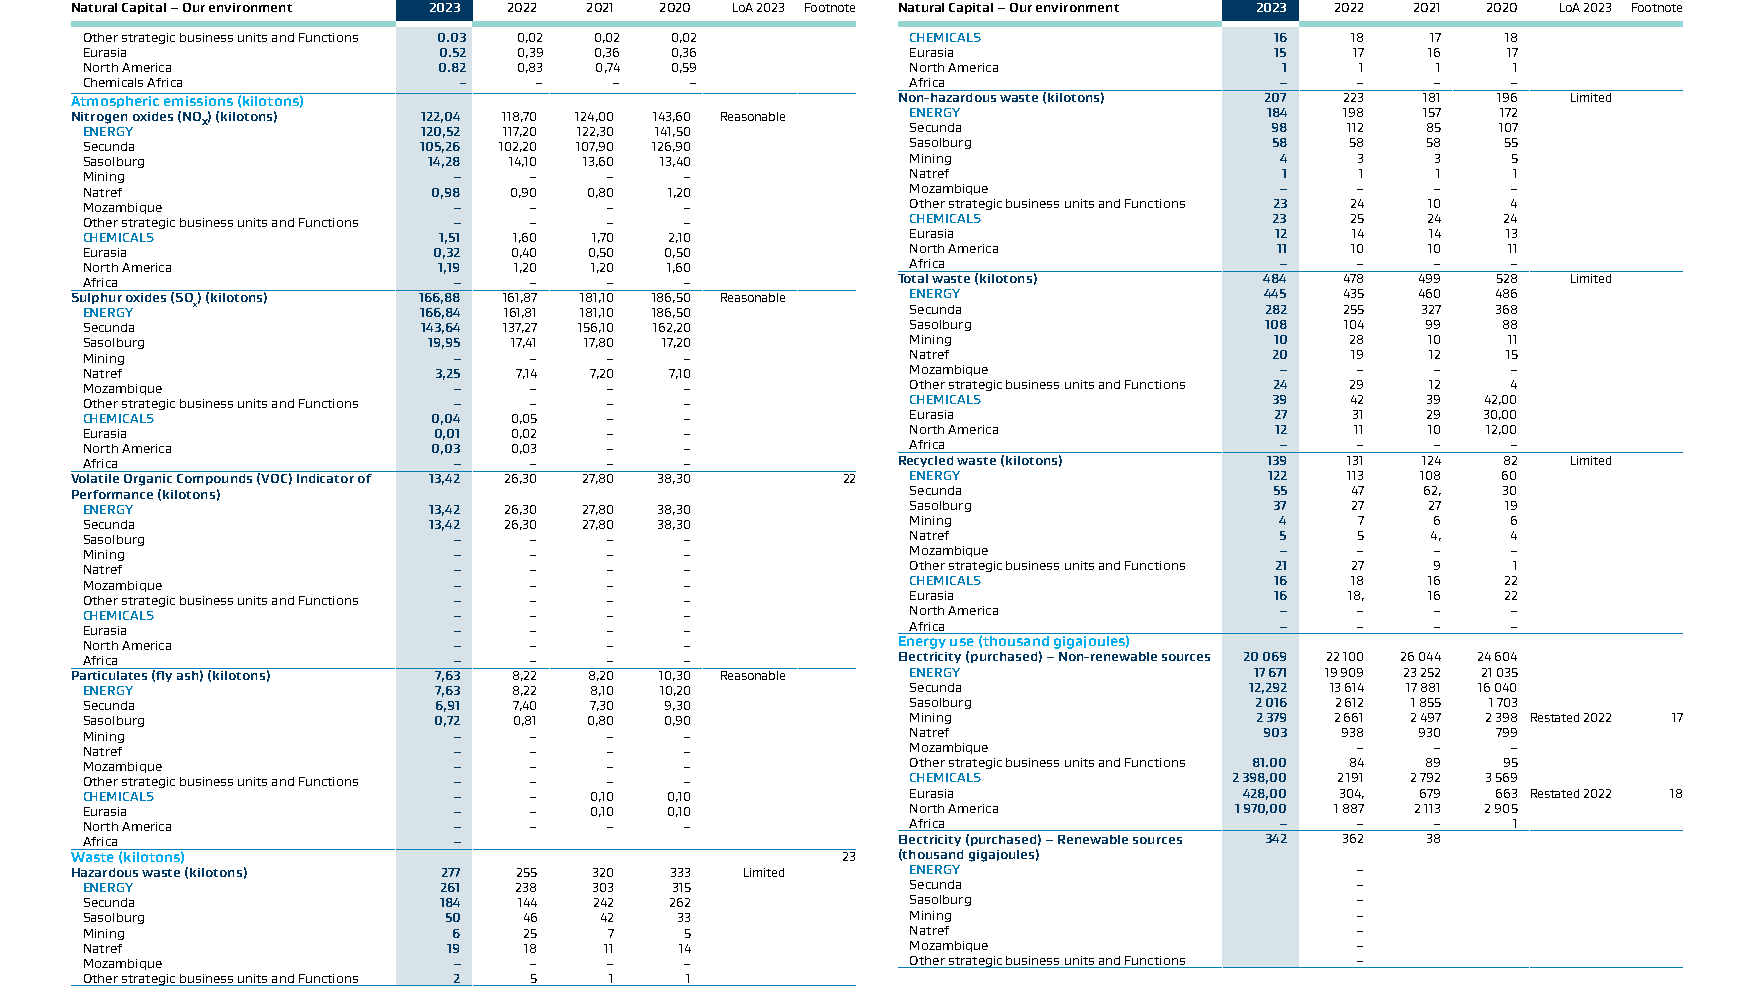

In [13]:
#left, top, right, bottom
bottom = page.crop((0, 0.15 * float(page.height), page.width, 0.95 * page.height))
im = bottom.to_image(resolution=150)
im

# split the page and extract left side

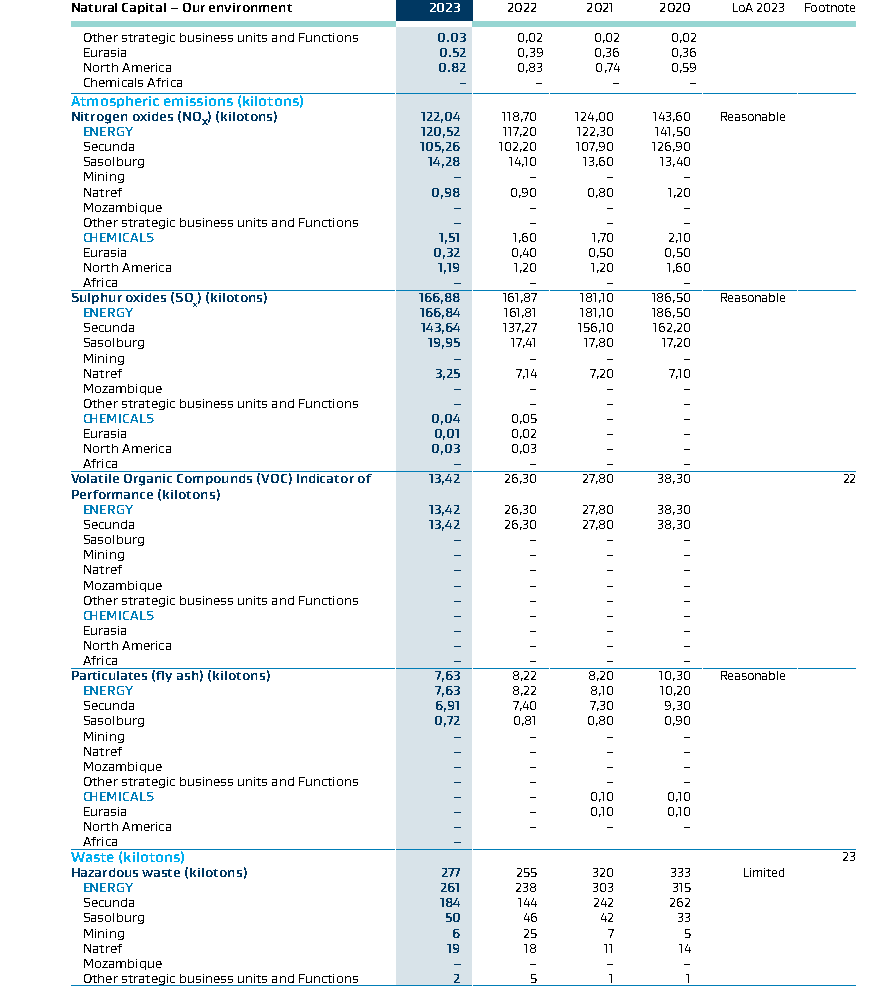

In [14]:
bottom_left = page.crop((0, 0.15 * float(page.height), 0.5 *(page.width), 0.95 *page.height))
im = bottom_left.to_image(resolution=150)
im

## split the page and extract Right side

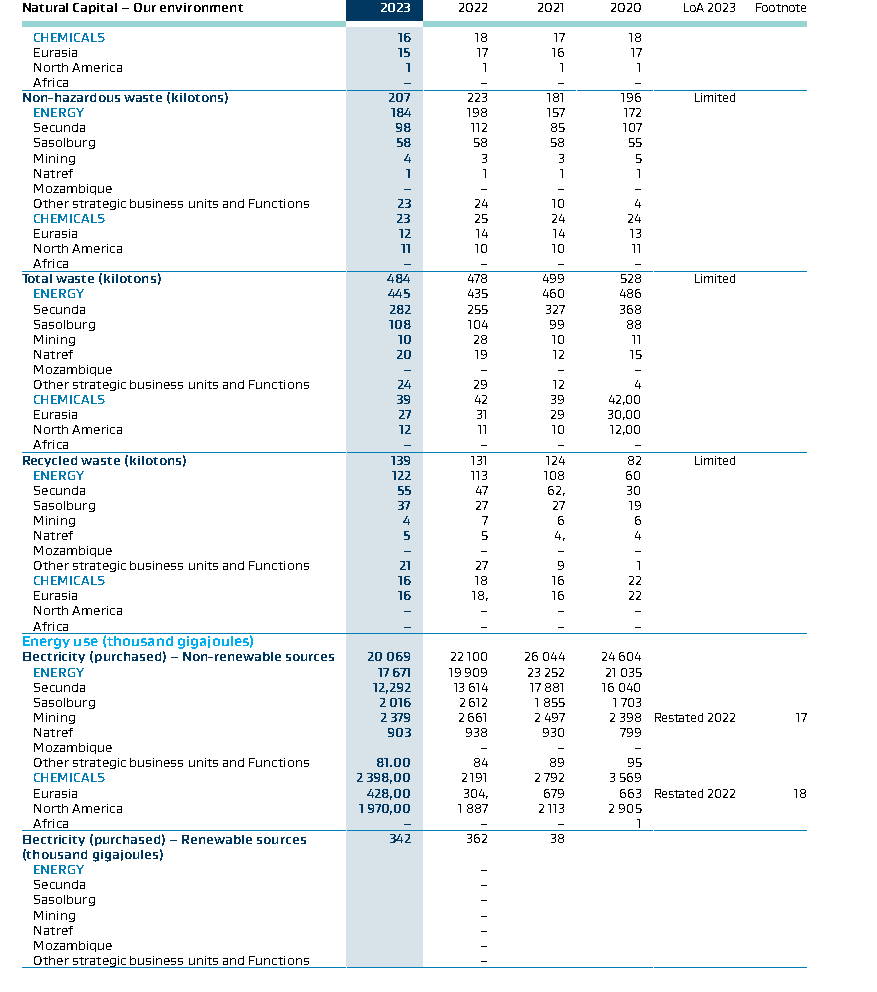

In [15]:

bottom_right = page.crop((0.5*page.width, 0.15 * float(page.height), page.width, 0.95 * page.height))
im = bottom_right.to_image(resolution=150)
im

## Tune the crop parameters/teble_settings after debugging by debug_tablefinder
For detailed description please follow the all possible table settings parameter from the original python package link.

Original package link:: https://github.com/jsvine/pdfplumber?tab=readme-ov-file#extracting-tables

In [16]:
table_settings = {'vertical_strategy': 'text',
 'horizontal_strategy': 'text',
 'min_words_vertical': 20,
 'text_y_tolerance': 3,
'join_tolerance': 3}

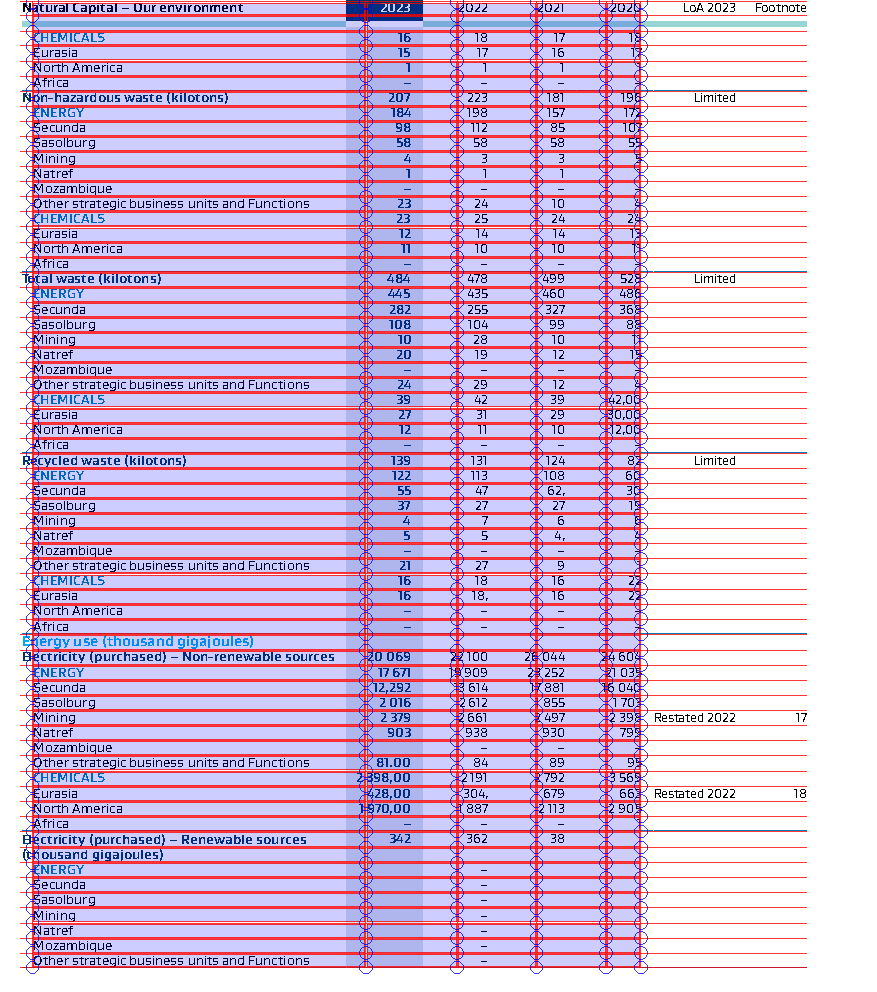

In [17]:
im.reset().debug_tablefinder(table_settings)

## extract data using extract_table command

In [25]:
table = bottom_right.extract_table(table_settings)
table

[['atural Capital – Our environment', '2023', '2022', '2021', '2020'],
 ['', '', '', '', ''],
 ['CHEMICALS', '16', '18', '17', '18'],
 ['Eurasia', '15', '17', '16', '17'],
 ['North America', '1', '1', '1', '1'],
 ['Africa', '–', '–', '–', '–'],
 ['on-hazardous waste (kilotons)', '207', '223', '181', '196'],
 ['ENERGY', '184', '198', '157', '172'],
 ['Secunda', '98', '112', '85', '107'],
 ['Sasolburg', '58', '58', '58', '55'],
 ['Mining', '4', '3', '3', '5'],
 ['Natref', '1', '1', '1', '1'],
 ['Mozambique', '–', '–', '–', '–'],
 ['Other strategic business units and Functions', '23', '24', '10', '4'],
 ['CHEMICALS', '23', '25', '24', '24'],
 ['Eurasia', '12', '14', '14', '13'],
 ['North America', '11', '10', '10', '11'],
 ['Africa', '–', '–', '–', '–'],
 ['tal waste (kilotons)', '484', '478', '499', '528'],
 ['ENERGY', '445', '435', '460', '486'],
 ['Secunda', '282', '255', '327', '368'],
 ['Sasolburg', '108', '104', '99', '88'],
 ['Mining', '10', '28', '10', '11'],
 ['Natref', '20', '19

In [26]:
## Create pandas dataframe 

In [27]:
data = pd.DataFrame(table, columns = table[0])

In [28]:
data.head()

,atural Capital – Our environment,2023,2022,2021,2020
0,atural Capital – Our environment,2023,2022,2021,2020
1,,,,,
2,CHEMICALS,16,18,17,18
3,Eurasia,15,17,16,17
4,North America,1,1,1,1


In [29]:
# END